In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
sns.set()
#import hvplot as hlt

In [365]:
df = pd.read_csv("final_data_cleaned_for_analysis.csv")
df

,Timestamp,age,gender,level,income level,income level (num),ID,Current career /future career,Data scientist?,devices count,...,Self study hours,Entertainment (general) hours,sum of the time spent,processor.,is it intel,processor generation,how powerful from 1_to_5,graphics card model,how powerful from 1_to_5.1,point of view
0,2023/04/27 11:05:28 PM GMT+3,19,Female,First,Medium,2,NaN,Data scientist,1,4,...,1,1,4,Core i7,1,8,4.0,NaN,NaN,Laptop
1,2023/04/27 11:07:17 PM GMT+3,21 or more,Male,Third,Low,1,2.020145e+10,Data scientist,1,2,...,3,5,10,Ryzen 5,0,4,4.0,Integrated AMD Graphics,2.0,"PC, more flexible in terms of future upgrades ..."
2,2023/04/27 11:15:08 PM GMT+3,20,Female,Second,Medium,2,2.022146e+10,mobile developer,0,4,...,1,8,12,Ryzen 5,0,10,4.0,NaN,NaN,Laptop :Portability
3,2023/04/27 11:47:44 PM GMT+3,19,Female,Second,Medium,2,NaN,Data scientist,1,3,...,3,1,6,Intel Xeon,1,8,2.0,INTEL HD Graphics,2.0,Laptop
4,2023/04/27 7:04:17 PM GMT+3,21 or more,Female,Third,Medium,2,2.024865e+08,web developer,0,3,...,1,3,4,Core i7,1,7,3.0,NaN,NaN,"Laptop, I can move with it everywere"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2023/05/05 11:55:34 PM GMT+3,19,Male,Second,Low,1,2.022169e+10,Data scientist,1,3,...,1,1,4,Ryzen 5,0,12,4.0,rtx 3060,5.0,i think that pc is better if you are thinking ...
102,2023/05/05 4:20:42 AM GMT+3,20,Female,Second,Lower medium,3,NaN,Electrical engineer,0,3,...,1,3,8,Core i7,1,11,5.0,NaN,NaN,Laptop because of mobility
103,2023/05/05 4:36:22 PM GMT+3,21 or more,Female,Fourth,Medium,2,2.019482e+09,Data scientist,1,3,...,5,3,16,Core i7,1,11,5.0,NaN,NaN,Pc for portability
104,2023/05/05 6:34:01 AM GMT+3,21 or more,Female,Fourth,Medium,2,NaN,Data scientist,1,4,...,3,5,18,Core i5,1,8,4.0,Intel Iris 5100,4.0,"PC, easily upgradable, costs less for same per..."


In [367]:
df.columns

Index(['Timestamp', 'age', 'gender', 'level', 'income level',
       'income level (num)', 'ID', 'Current career /future career',
       'Data scientist?', 'devices count', 'own Laptop', 'own DeskTop',
       'own Tablet', 'device use ratio ', 'main device', 'MAIN usage device',
       'Surfing the internet', 'device price', 'what would you rebuy',
       'would he chage his device', 'operating system',
       'device's performance.', 'Screen size importance',
       'Portability importance', 'Upgradability importance',
       ' working without cable importance', 'Performance importance',
       'Affordability importance', 'CD existence importance',
       'Integrated camera importance', 'Multiple monitors importance',
       'hours Gaming', 'hours Work', 'hours Academic study',
       'Self study hours ', 'Entertainment (general) hours ',
       'sum of the time spent', 'processor.', 'is it intel ',
       'processor generation', 'how powerful from 1_to_5',
       'graphics card model

## Data Cleaning

In [368]:
df.drop(axis = 0, index = 65).iloc[65]

Timestamp                                            2023/05/03 1:58:35 PM GMT+3
age                                                                           18
gender                                                                      Male
level                                                                     Second
income level                                                                 Low
income level (num)                                                             1
ID                                                                 20221450635.0
Current career /future career                                     Data scientist
Data scientist?                                                                1
devices count                                                                  3
own Laptop                                                                   Yes
own DeskTop                                                                  Yes
own Tablet                  

In [369]:
df.rename(columns= {'Current career /future career':'career_path','is it intel ':'intel'},inplace=True)
df.rename(columns = lambda x: x.replace("'s",""),inplace=True)
df.rename(columns = lambda x: x.replace('.',''),inplace=True)
df.rename(columns = lambda x: x.replace('?',''),inplace=True)
df.rename(columns=lambda x: x.strip().lower().replace(' ','_'),inplace=True)

In [370]:
df['device_use_ratio'].value_counts()

I only use laptop                              34
I don�t have both                              23
80% using laptop 20% using desktop computer    19
20% using laptop 80% using desktop computer    10
60% using laptop 40% using desktop computer     7
I only use PC                                   6
40% using laptop 60% using desktop computer     4
I don’t have both                               2
50% using laptop 50% using desktop computer     1
Name: device_use_ratio, dtype: int64

In [371]:
df.device_use_ratio = df.device_use_ratio.replace(["I don�t have both", "I don’t have both"], 'I have neither')

In [372]:
df['desktop_perc'] = df.device_use_ratio.replace(['I have neither', 'I only use laptop', '80% using laptop 20% using desktop computer',
                                               '60% using laptop 40% using desktop computer', '50% using laptop 50% using desktop computer',
                                               '40% using laptop 60% using desktop computer', '20% using laptop 80% using desktop computer', 
                                               'I only use PC'], [0, 0, 0.2, 0.4, 0.5, 0.6, 0.8, 1])
df['laptop_perc'] = df.device_use_ratio.replace(['I have neither', 'I only use laptop', '80% using laptop 20% using desktop computer',
                                               '60% using laptop 40% using desktop computer', '50% using laptop 50% using desktop computer',
                                               '40% using laptop 60% using desktop computer', '20% using laptop 80% using desktop computer', 
                                               'I only use PC'], [0, 1, 0.8, 0.6, 0.5, 0.4, 0.2, 0])

df.drop(columns=['device_use_ratio'], inplace=True)

In [373]:
df['desktop_perc'].unique()

array([0. , 0.2, 0.8, 0.4, 1. , 0.6, 0.5])

In [374]:
df.device_price.replace('          ', None, inplace = True)
df.device_price.replace('           ', None, inplace = True)
df.device_price.unique()

array(['15000', '13000', '8000', '18000', '26000', '10000', '30000',
       '28000', '35000', '13800', '3500', '21000', '20000', '16000',
       '19000', '17000', '5000', '12000', '25000', '14000', '23000',
       '4000', '18500', '4500', '11000', '3000', '18950', '24000',
       '40000', '32000', '2400', '14800', '22000', '50000', '4600',
       '7000', '3900', '27000', '38000', '15500', '7500'], dtype=object)

In [375]:
df.device_price = df.device_price.replace(' ', None, regex=True).astype(float)
df.device_price.fillna(df.device_price.mean(), inplace=True)

In [376]:
df.how_powerful_from_1_to_5.fillna(round(df.how_powerful_from_1_to_5.mean()), inplace=True)

In [377]:
df.how_powerful_from_1_to_5.unique()

array([4., 2., 3., 5., 1.])

In [378]:
df['device_price'].unique()

array([15000., 13000.,  8000., 18000., 26000., 10000., 30000., 28000.,
       35000., 13800.,  3500., 21000., 20000., 16000., 19000., 17000.,
        5000., 12000., 25000., 14000., 23000.,  4000., 18500.,  4500.,
       11000.,  3000., 18950., 24000., 40000., 32000.,  2400., 14800.,
       22000., 50000.,  4600.,  7000.,  3900., 27000., 38000., 15500.,
        7500.])

In [379]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [380]:
df.age = df.age.replace('21 or more', 21)
df.age = df.age.astype(int)

In [381]:
df.level.value_counts()

Second    42
First     34
Fourth    15
Third     15
Name: level, dtype: int64

In [382]:
df.level.unique()
df.level = df.level.replace(['First', 'Second', 'Third', 'Fourth'], [1, 2, 3, 4])

In [383]:
df.devices_count.value_counts()

3            48
4            27
2            24
5 or more     4
1             3
Name: devices_count, dtype: int64

In [384]:
df.devices_count = df.devices_count.replace('5 or more', 5).astype(int)

In [385]:
df['what_would_you_rebuy_for_laptop_imp'] = df.what_would_you_rebuy.replace(['Laptop', 'Desktop computer'], [1, 0])
df['what_would_you_rebuy_for_desktop_imp'] = df.what_would_you_rebuy.replace(['Desktop computer', 'Laptop'], [1, 0])
df.drop(columns=['what_would_you_rebuy'], inplace=True)

In [386]:
df.how_powerful_from_1_to_5.value_counts()

5.0    33
3.0    32
4.0    28
2.0     8
1.0     5
Name: how_powerful_from_1_to_5, dtype: int64

## Descriptive Statistics

In [451]:
dfplot=df.select_dtypes(exclude=['object'])
dfplot

,age,level,income_level_(num),id,data_scientist,devices_count,main_device,surfing_the_internet,device_price,would_he_chage_his_device,...,entertainment_(general)_hours,sum_of_the_time_spent,intel,processor_generation,how_powerful_from_1_to_5,how_powerful_from_1_to_51,desktop_perc,laptop_perc,what_would_you_rebuy_for_laptop_imp,what_would_you_rebuy_for_desktop_imp
0,19,1,2,2.019152e+10,1,4,1.0,0,15000.0,0,...,1,4,1,8,4.0,5.0,0.0,1.0,1,0
1,21,3,1,2.020145e+10,1,2,1.0,0,13000.0,0,...,5,10,0,4,4.0,2.0,0.0,0.0,0,1
2,20,2,2,2.022146e+10,0,4,1.0,0,8000.0,0,...,8,12,0,10,4.0,5.0,0.0,1.0,1,0
3,19,2,2,2.019152e+10,1,3,1.0,0,18000.0,0,...,1,6,1,8,2.0,2.0,0.2,0.8,1,0
4,21,3,2,2.024865e+08,0,3,1.0,0,15000.0,0,...,3,4,1,7,3.0,5.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,19,2,1,2.022169e+10,1,3,0.0,0,30000.0,0,...,1,4,0,12,4.0,5.0,0.8,0.2,0,1
102,20,2,3,2.019152e+10,0,3,1.0,1,30000.0,0,...,3,8,1,11,5.0,5.0,0.2,0.8,1,0
103,21,4,2,2.019482e+09,1,3,1.0,0,38000.0,0,...,3,16,1,11,5.0,5.0,0.2,0.8,1,0
104,21,4,2,2.019152e+10,1,4,0.0,0,15500.0,0,...,5,18,1,8,4.0,4.0,0.6,0.4,0,1


age
level
income_level_(num)
id
data_scientist
devices_count
main_device
surfing_the_internet
device_price
would_he_chage_his_device
screen_size_importance
portability_importance
upgradability_importance
working_without_cable_importance
performance_importance
affordability_importance
cd_existence_importance
integrated_camera_importance


<ipython-input-458-f8b42e3c2d74>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


multiple_monitors_importance
hours_gaming
hours_work
hours_academic_study
self_study_hours
entertainment_(general)_hours
sum_of_the_time_spent
intel
processor_generation
how_powerful_from_1_to_5
how_powerful_from_1_to_51
desktop_perc
laptop_perc
what_would_you_rebuy_for_laptop_imp
what_would_you_rebuy_for_desktop_imp


<Figure size 432x288 with 0 Axes>

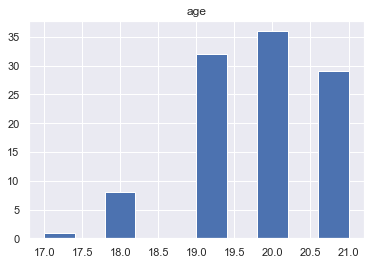

<Figure size 432x288 with 0 Axes>

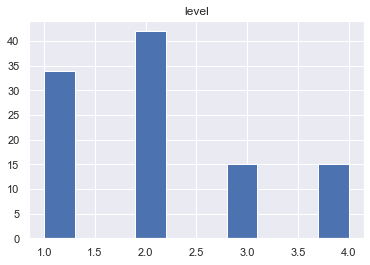

<Figure size 432x288 with 0 Axes>

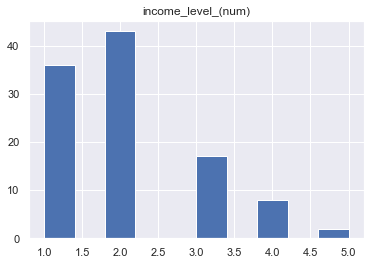

<Figure size 432x288 with 0 Axes>

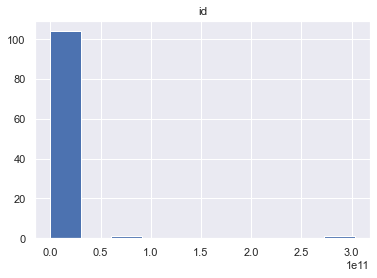

<Figure size 432x288 with 0 Axes>

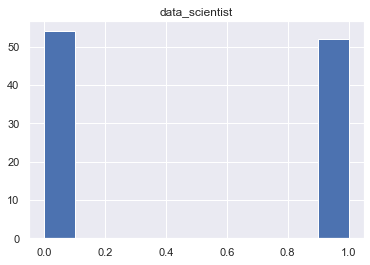

<Figure size 432x288 with 0 Axes>

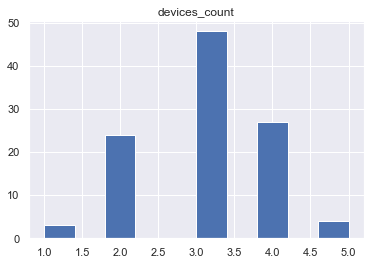

<Figure size 432x288 with 0 Axes>

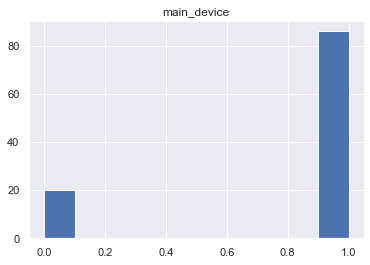

<Figure size 432x288 with 0 Axes>

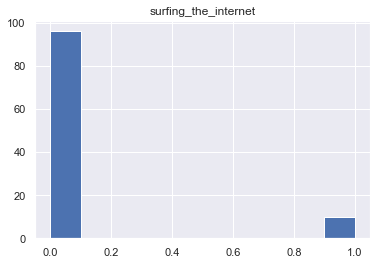

<Figure size 432x288 with 0 Axes>

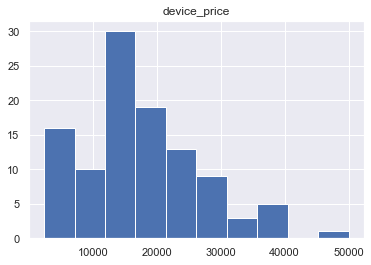

<Figure size 432x288 with 0 Axes>

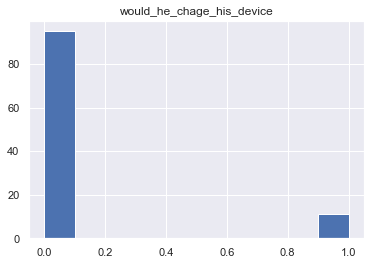

<Figure size 432x288 with 0 Axes>

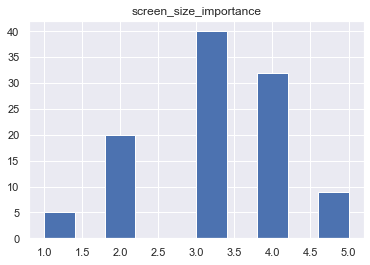

<Figure size 432x288 with 0 Axes>

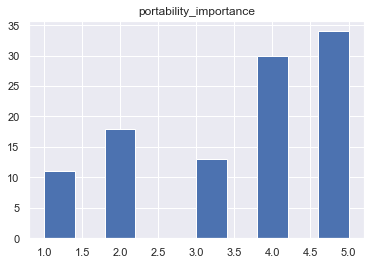

<Figure size 432x288 with 0 Axes>

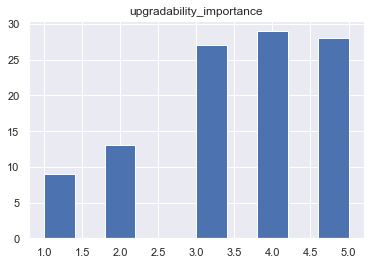

<Figure size 432x288 with 0 Axes>

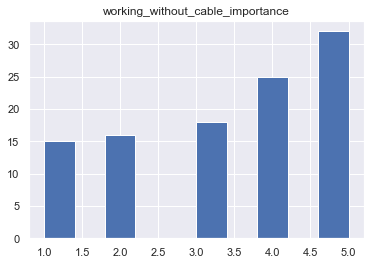

<Figure size 432x288 with 0 Axes>

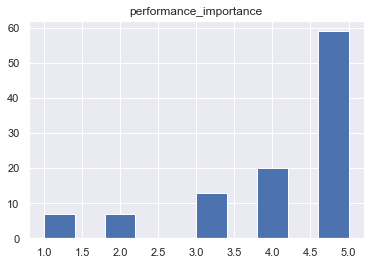

<Figure size 432x288 with 0 Axes>

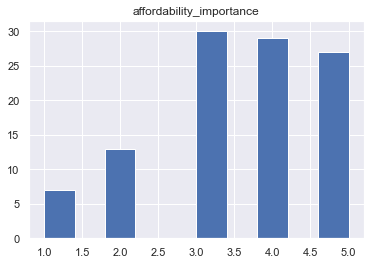

<Figure size 432x288 with 0 Axes>

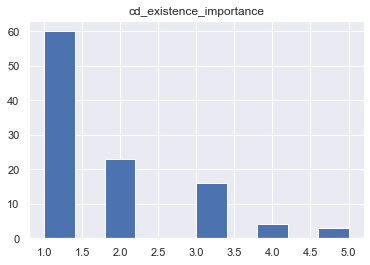

<Figure size 432x288 with 0 Axes>

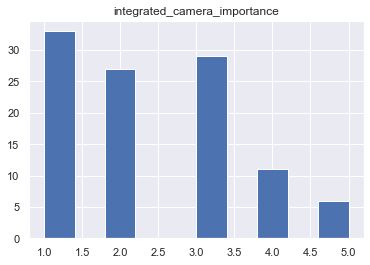

<Figure size 432x288 with 0 Axes>

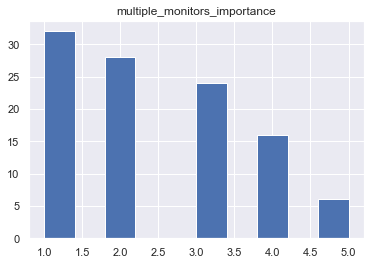

<Figure size 432x288 with 0 Axes>

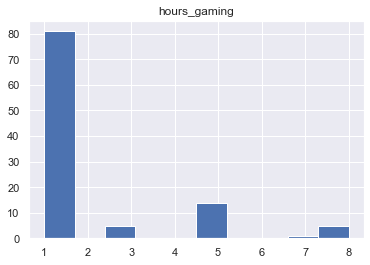

<Figure size 432x288 with 0 Axes>

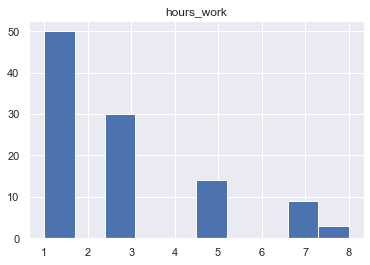

<Figure size 432x288 with 0 Axes>

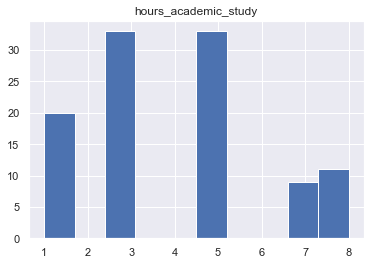

<Figure size 432x288 with 0 Axes>

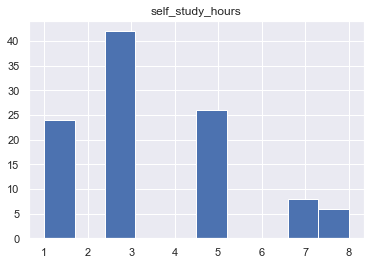

<Figure size 432x288 with 0 Axes>

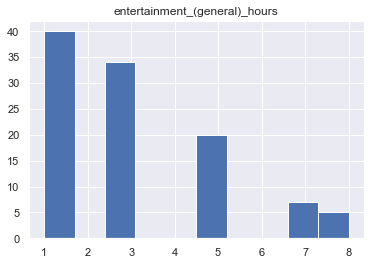

<Figure size 432x288 with 0 Axes>

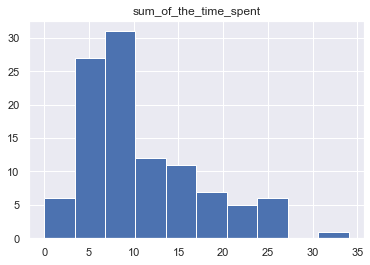

<Figure size 432x288 with 0 Axes>

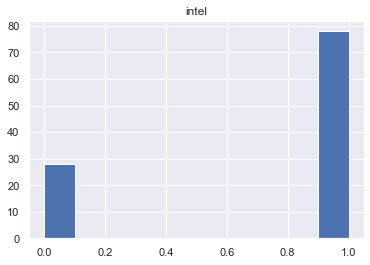

<Figure size 432x288 with 0 Axes>

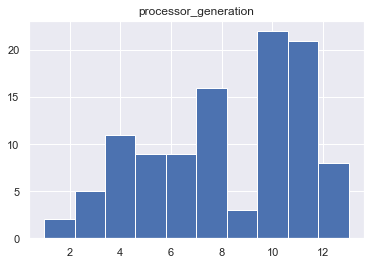

<Figure size 432x288 with 0 Axes>

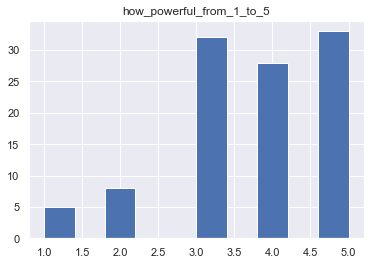

<Figure size 432x288 with 0 Axes>

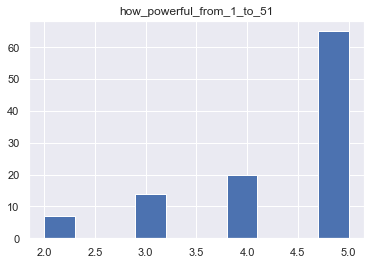

<Figure size 432x288 with 0 Axes>

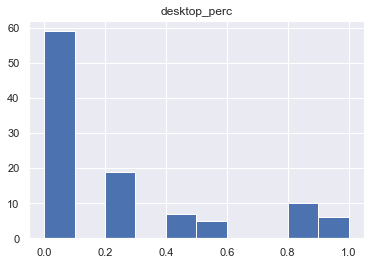

<Figure size 432x288 with 0 Axes>

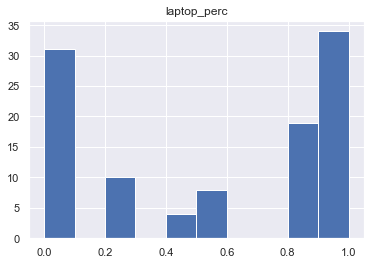

<Figure size 432x288 with 0 Axes>

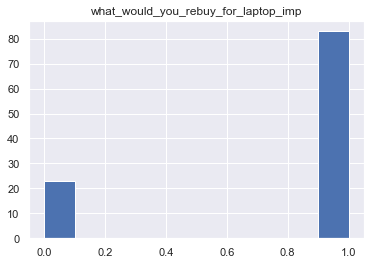

<Figure size 432x288 with 0 Axes>

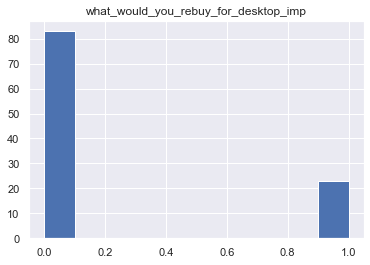

In [458]:
for column in dfplot:
    print(column)
    plt.figure()
    dfplot.hist([column])


In [387]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,106.0,1.979245e+01,9.632977e-01,17.0,1.900000e+01,2.000000e+01,2.100000e+01,2.100000e+01
level,106.0,2.103774e+00,1.013520e+00,1.0,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
income_level_(num),106.0,2.028302e+00,9.900221e-01,1.0,1.000000e+00,2.000000e+00,2.750000e+00,5.000000e+00
id,106.0,1.770197e+10,3.034174e+10,21010023.0,2.650834e+08,2.019152e+10,2.020150e+10,3.030000e+11
data_scientist,106.0,4.905660e-01,5.022859e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
devices_count,106.0,3.047170e+00,8.661032e-01,1.0,2.250000e+00,3.000000e+00,4.000000e+00,5.000000e+00
main_device,106.0,8.113208e-01,3.931123e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
surfing_the_internet,106.0,9.433962e-02,2.936892e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
device_price,106.0,1.763538e+04,9.828060e+03,2400.0,1.200000e+04,1.600000e+04,2.300000e+04,5.000000e+04
would_he_chage_his_device,106.0,1.037736e-01,3.064154e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [388]:
df.corr()["what_would_you_rebuy_for_laptop_imp"].sort_values()["hours_gaming"]

-0.41291801513493465

In [389]:
df.columns

Index(['timestamp', 'age', 'gender', 'level', 'income_level',
       'income_level_(num)', 'id', 'career_path', 'data_scientist',
       'devices_count', 'own_laptop', 'own_desktop', 'own_tablet',
       'main_device', 'main_usage_device', 'surfing_the_internet',
       'device_price', 'would_he_chage_his_device', 'operating_system',
       'device_performance', 'screen_size_importance',
       'portability_importance', 'upgradability_importance',
       'working_without_cable_importance', 'performance_importance',
       'affordability_importance', 'cd_existence_importance',
       'integrated_camera_importance', 'multiple_monitors_importance',
       'hours_gaming', 'hours_work', 'hours_academic_study',
       'self_study_hours', 'entertainment_(general)_hours',
       'sum_of_the_time_spent', 'processor', 'intel', 'processor_generation',
       'how_powerful_from_1_to_5', 'graphics_card_model',
       'how_powerful_from_1_to_51', 'point_of_view', 'desktop_perc',
       'laptop_perc'

In [390]:
df.corr().portability_importance['working_without_cable_importance']

0.7188196379765331

In [391]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   timestamp                             106 non-null    object 
 1   age                                   106 non-null    int32  
 2   gender                                106 non-null    object 
 3   level                                 106 non-null    int64  
 4   income_level                          106 non-null    object 
 5   income_level_(num)                    106 non-null    int64  
 6   id                                    106 non-null    float64
 7   career_path                           106 non-null    object 
 8   data_scientist                        106 non-null    int64  
 9   devices_count                         106 non-null    int32  
 10  own_laptop                            106 non-null    object 
 11  own_desktop        

In [426]:
replace_map = {'Medium end device ' : 'Medium end device', 'high end specs ': 'high end specs'}
df["device_performance"] = df["device_performance"].replace(replace_map)
df["device_performance"].unique()

array(['Medium end device', 'medium high specs', 'high end specs',
       'Low end device'], dtype=object)

In [427]:
group = df.groupby(["device_performance"])
group.count()

,timestamp,age,gender,level,income_level,income_level_(num),id,career_path,data_scientist,devices_count,...,intel,processor_generation,how_powerful_from_1_to_5,graphics_card_model,how_powerful_from_1_to_51,point_of_view,desktop_perc,laptop_perc,what_would_you_rebuy_for_laptop_imp,what_would_you_rebuy_for_desktop_imp
device_performance,,,,,,,,,,,,,,,,,,,,,
Low end device,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Medium end device,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
high end specs,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
medium high specs,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50


<AxesSubplot:ylabel='timestamp'>

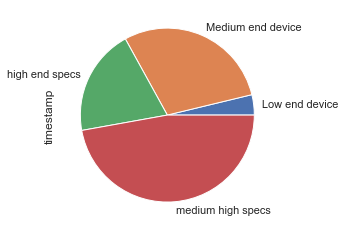

In [428]:
group.count()["timestamp"].plot.pie()

We see that the sampling is not representative enough for low end devices, which is expected given that the sample is drawn from Computer science majors and professionals, we focus on analyzing the differences between the other 3 segments

In [430]:
df_by_performance = df[df["device_performance"] != "Low end device"]
group = df_by_performance.groupby("device_performance")

<AxesSubplot:ylabel='timestamp'>

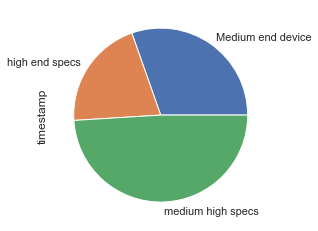

In [437]:
group.count()["timestamp"].plot.pie()

In [438]:
group.mean()["device_price"]

device_performance
Medium end device    13345.161290
high end specs       26180.952381
medium high specs    16997.000000
Name: device_price, dtype: float64

We see that device price is consistent with device performance

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   timestamp                             106 non-null    object 
 1   age                                   106 non-null    int32  
 2   gender                                106 non-null    object 
 3   level                                 106 non-null    int64  
 4   income_level                          106 non-null    object 
 5   income_level_(num)                    106 non-null    int64  
 6   id                                    106 non-null    float64
 7   career_path                           106 non-null    object 
 8   data_scientist                        106 non-null    int64  
 9   devices_count                         106 non-null    int32  
 10  own_laptop                            106 non-null    object 
 11  own_desktop        

<AxesSubplot:xlabel='what_would_you_rebuy_for_laptop_imp', ylabel='device_price'>

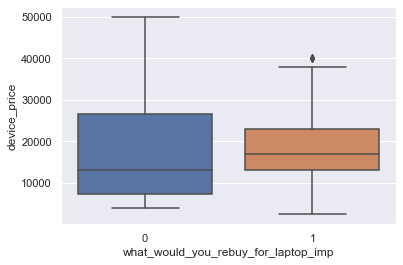

In [338]:
sns.boxplot(y = df["device_price"], x = df["what_would_you_rebuy_for_laptop_imp"], orient = "v")


In [4]:
df.drop(columns=['Timestamp','ID', 'point of view','graphics card model','how powerful from 1_to_5.1', 'main device', 
                            'is it intel ', 'sum of the time spent', 'own DeskTop', 'own Laptop', 'Data scientist?', "device's performance.", 
                            'would he chage his device'], inplace=True)

# don't use ['main_usage_device','income_level', 'gender'] 

## Inferential statistics

In [115]:
df['what_would_you_rebuy_for_laptop_imp'].std()

0.4141478222666759

#### Is the mean income for one group greater than another?

In [214]:
df_pc = df[df['what_would_you_rebuy_for_laptop_imp'] == 0]
df_lap = df[df['what_would_you_rebuy_for_laptop_imp'] == 1]

(array([12.,  0.,  0.,  9.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

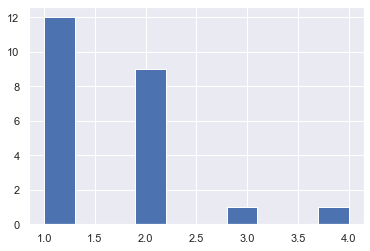

In [215]:
plt.hist(df_pc["income_level_(num)"])

(array([24.,  0., 34.,  0.,  0., 16.,  0.,  7.,  0.,  2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

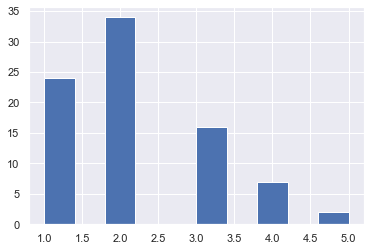

In [143]:
plt.hist(df_lap["income_level_(num)"])

In [145]:
mean_income_lap = df_lap["income_level_(num)"].mean()
mean_income_pc = df_pc["income_level_(num)"].mean()
print(mean_cost_lap)
print(mean_cost_pc)

2.144578313253012
1.608695652173913


In [155]:
df_pc.shape

(23, 58)

$H_0: \mu_1 = \mu_2$<br>
$H_1: \mu_1 \neq \mu_2$

Since the sample sizes are very small and the distributions are hard to identify, we use empirical statistical methods to perform hypothesis testing.
The most suitable to use here is bootstrap.

In [295]:
df_lap["income_level"]

0            Medium
2            Medium
3            Medium
4            Medium
5            Medium
           ...     
98              Low
99           Medium
100            High
102    Lower medium
103          Medium
Name: income_level, Length: 83, dtype: object

In [318]:
iterations = 1000
bootstrap_data = np.zeros(iterations)
for i in range(iterations):
    bootstrap_data[i] = np.random.choice(df_lap["income_level_(num)"], size = 23, replace = True).mean() - np.random.choice(df_pc["income_level_(num)"], size = 23, replace = True).mean()

In [319]:
bootstrap_data.sort()


In [321]:
bootstrap_data[1:20]

array([-0.39130435, -0.30434783, -0.26086957, -0.17391304, -0.13043478,
       -0.08695652, -0.08695652, -0.08695652, -0.08695652, -0.08695652,
       -0.08695652, -0.08695652, -0.04347826, -0.04347826, -0.04347826,
       -0.04347826, -0.04347826, -0.04347826, -0.04347826])

(array([  4.,   9.,  38., 117., 218., 253., 221., 103.,  27.,  10.]),
 array([-0.39130435, -0.22173913, -0.05217391,  0.1173913 ,  0.28695652,
         0.45652174,  0.62608696,  0.79565217,  0.96521739,  1.13478261,
         1.30434783]),
 <BarContainer object of 10 artists>)

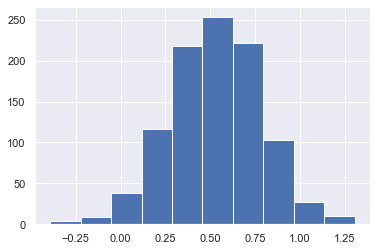

In [322]:
plt.hist(bootstrap_data)

In [287]:
bootstrap_point_mean = bootstrap_data.mean()
bootstrap_point_mean

0.5333478260869565

In [282]:
alpha = 0.05

The bootstrap confidence interval is constructed by taking the value at $\frac{\alpha}{2} \times iterations and iterations - \frac{\alpha}{2} \times iterations$

In [291]:
left_bound =  bootstrap_data[math.ceil(alpha * iterations / 2)]
right_bound = bootstrap_data[math.ceil(1 - alpha * iterations / 2)]

In [294]:
print("95% confidence interval for mu1 - mu2:")
print("[", left_bound, " , ", right_bound, "]")

95% confidence interval for mu1 - mu2:
[ 0.04347826086956519  ,  1.0434782608695652 ]


The bootstrap hypothesis test is performed by checking whether the value for the variable lies within the acceptance region or not, since the null hypothesis states that $X = 0$ where $X = \mu_1 - \mu_2$, and $0$ lies outside the acceptance region, then we have enough evidence to reject $H_0$ with 95% confidence, and we claim that income does have an impact on what device one will choose

#### Are people more willing to spend more on desktops or laptops?

In [285]:
df.corr()['what_would_you_rebuy_for_laptop_imp'].sort_values()

what_would_you_rebuy_for_desktop_imp   -1.000000
desktop_perc                           -0.488552
hours_gaming                           -0.412918
Mac                                    -0.263435
Teaching                               -0.185388
Student                                -0.185388
Snapdragon 8 gen 3 + pro max ultra     -0.185388
entertainment_(general)_hours          -0.174854
Male                                   -0.150306
Video Game Developer                   -0.135972
level                                  -0.127360
Data scientist                         -0.114437
Ryzen 5                                -0.109533
own_tablet                             -0.107744
upgradability_importance               -0.097660
AMD a8                                 -0.095217
AMD a6                                 -0.095217
Core i5                                -0.075733
screen_size_importance                 -0.061405
hours_work                             -0.049483
mobile developer    

## Building the model

In [27]:
df.drop(columns=['working_without_cable_importance', 'affordability_importance', 'processor_generation'], inplace=True)
# dropped due to multicollinearity

In [28]:
ohe = OneHotEncoder(drop='first')

gender_enc = ohe.fit_transform(df[['gender']])
df[list(ohe.categories_[0])[1:]] = gender_enc.toarray()

own_tablet_enc = ohe.fit_transform(df[['own_tablet']])
df['own_tablet'] = own_tablet_enc.toarray()

operating_system_enc = ohe.fit_transform(df[['operating_system']])
df[list(ohe.categories_[0])[1:]] = operating_system_enc.toarray()
df.drop(columns=['operating_system'], inplace=True)

career_path_enc = ohe.fit_transform(df[['career_path']])
df[list(ohe.categories_[0])[1:]] = career_path_enc.toarray()
df.drop(columns=['career_path'], inplace=True)

processor_enc = ohe.fit_transform(df[['processor']])
df[list(ohe.categories_[0])[1:]] = processor_enc.toarray()
df.drop(columns=['processor'], inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   106 non-null    int32  
 1   gender                                106 non-null    object 
 2   level                                 106 non-null    int64  
 3   income_level                          106 non-null    object 
 4   income_level_(num)                    106 non-null    int64  
 5   devices_count                         106 non-null    int32  
 6   own_tablet                            106 non-null    float64
 7   main_usage_device                     106 non-null    object 
 8   surfing_the_internet                  106 non-null    int64  
 9   device_price                          106 non-null    float64
 10  screen_size_importance                106 non-null    int64  
 11  portability_importa

In [30]:
df['own_tablet'].unique()

array([1., 0.])

In [31]:
X = df.drop(columns=['main_usage_device','income_level', 'gender', 'what_would_you_rebuy_for_laptop_imp', 'what_would_you_rebuy_for_desktop_imp'])
y_lap = df['what_would_you_rebuy_for_laptop_imp']
y_desk = df['what_would_you_rebuy_for_desktop_imp']


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y_lap, test_size=.2, random_state=42)

In [109]:
df.what_would_you_rebuy_for_laptop_imp.value_counts(normalize=True)
# baseline is 0.78

1    0.783019
0    0.216981
Name: what_would_you_rebuy_for_laptop_imp, dtype: float64

In [110]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [111]:
df

,age,gender,level,income_level,income_level_(num),devices_count,own_tablet,main_usage_device,surfing_the_internet,device_price,...,Core i3,Core i5,Core i7,Core i9,Intel Xeon,Ryzen 3,Ryzen 5,Ryzen 7,Ryzen 9,Snapdragon 8 gen 3 + pro max ultra
0,19,Female,1,Medium,2,4,1.0,Study,0,15000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21,Male,3,Low,1,2,1.0,Study,0,13000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,20,Female,2,Medium,2,4,1.0,Study,0,8000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,19,Female,2,Medium,2,3,1.0,Study,0,18000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,21,Female,3,Medium,2,3,0.0,Study,0,15000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,19,Male,2,Low,1,3,1.0,Gaming,0,30000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
102,20,Female,2,Lower medium,3,3,1.0,Surfing the internet,1,30000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,21,Female,4,Medium,2,3,1.0,Study,0,38000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,21,Female,4,Medium,2,4,1.0,Work,0,15500.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
model.score(X_test, y_test)
# The accuracy is better than the baseline.
# We evaluated the model, and we can see that it's valuable. Now we can use the whole data for training.

0.8181818181818182

## Model Interpretation

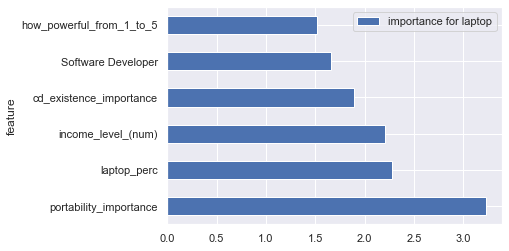

In [36]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y_lap)
feature_importance = pd.DataFrame(list(X.columns), columns = ["feature"])
feature_importance["importance for laptop"] = pow(math.e, model.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance for laptop"], ascending=False).head(6)
 
feature_importance.plot.barh(x='feature', y='importance for laptop');

- The 'portability importance' is the most effective feature for increasing the odds of buying a laptop as the next device. An increase of the 'portability importance' feature by one unit increases the odds of buying a laptop by a factor of 3.5 when all other features remain the same.
- An increase of the 'income level' feature by one unit increases the odds of buying a laptop by a factor of 2.42 when all other features remain the same.
- An increase of the 'laptop usage percentage' feature by one unit increases the odds of buying a laptop by a factor of 2.21 when all other features remain the same.
- An increase of the 'CD existence importance    ' feature by one unit increases the odds of buying a laptop by a factor of 1.87 when all other features remain the same.
- Using the device for studying mainly increases the odds of buying a laptop by a factor of 1.74 when all other features remain the same.

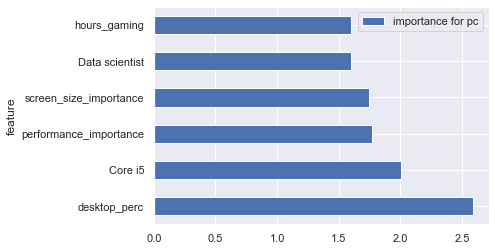

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y_desk)
feature_importance = pd.DataFrame(list(X.columns), columns = ["feature"])
feature_importance["importance for pc"] = pow(math.e, model.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance for pc"], ascending=False).head(6)
 
feature_importance.plot.barh(x='feature', y='importance for pc');

- The 'desktop usage percentage' is the most effective feature for increasing the odds of buying a desktop as the next device. An increase of the 'desktop usage percentage' feature by one unit increases the odds of buying a desktop by a factor of 2.48 when all other features remain the same.
- Having a Core i5 processor increases the odds of buying a desktop by a factor of 1.98 when all other features remain the same.
- An increase of the 'performance importance' feature by one unit increases the odds of buying a desktop as the next by a factor of 1.84 when all other features remain the same.
- An increase of the 'screen size importance' feature by one unit increases the odds of buying a desktop by a factor of 1.83 when all other features remain the same.
- Being a Data scientist increases the odds of buying a desktop by a factor of 1.6 when all other features remain the same.

In [ ]:
gm = df.groupby('income_level').sum()
gm.reset_index(inplace=True)
gm.hvplot.bar(x = 'income_level' ,y = 'devices_count',)